# Image Augmentation

## Import modules

In [60]:
import cv2
import albumentations as A
import random
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Setting table

In [61]:
IMAGE_DATASET_DIRECTORY_PATH: str = (
    "D:\DATA SCIENCE\CLOUD\DATASETS\cats_and_dogs\SANBOX_2"
)

RANDOM_SEED: int = 1

# Random check
AUGMENTATION_RANDOM_CHECK_ENABLE: bool = True
AUGMENTATION_RANDOM_CHECK_AMOUNT: int = 4

# Number of replica
AUGMENTATION_REPLICA_AMOUNT: int = 5
SAMPLE_IMAGE_DISPLAY_AMOUNT: int = 10
AUGMENTATION_REPLICA_DISPLAY_AMOUNT: int = 5

HORIZONTAL_FLIP_ENABLE: bool = True
HORIZONTAL_FLIP_PROB: float = 0.5

## Conditions check

In [62]:
# IMAGE_DATASET_DIRECTORY_PATH
assert (len(IMAGE_DATASET_DIRECTORY_PATH)), (f"IMAGE_DATASET_DIRECTORY_PATH must not be empty!")
assert (len(os.listdir(IMAGE_DATASET_DIRECTORY_PATH))), (f"IMAGE_DATASET_DIRECTORY_PATH must contain at least one image!")

# # AUGMENTATION_RANDOM_CHECK_AMOUNT
# assert (AUGMENTATION_RANDOM_CHECK_AMOUNT >= 0), (f"AUGMENTATION_RANDOM_CHECK_AMOUNT can be \n ZERO: Turn off random check feature. \n POSITIVE: generate random amount of images and their augmented replicas.")
# assert (AUGMENTATION_RANDOM_CHECK_AMOUNT <= len(os.listdir(IMAGE_DATASET_DIRECTORY_PATH))), ("AUGMENTATION_RANDOM_CHECK_AMOUNT must be smaller than population size!")

# # AUGMENTATION_REPLICA
# assert (AUGMENTATION_REPLICA > 0), (f"AUGMENTATION_REPLICA must be positive!")


## Augmentation configuration

In [63]:
transform_option_list = []

if HORIZONTAL_FLIP_ENABLE:
    transform_option_list.append(A.HorizontalFlip(p=HORIZONTAL_FLIP_PROB))

transform = A.Compose(transform_option_list)

## Load processing

In [64]:
if AUGMENTATION_RANDOM_CHECK_ENABLE:
    sample_images = []
    transformed_image_matrix = []
    sample_name_list = random.sample(os.listdir(IMAGE_DATASET_DIRECTORY_PATH), AUGMENTATION_RANDOM_CHECK_AMOUNT)
    for i in range(AUGMENTATION_RANDOM_CHECK_AMOUNT):
        image = cv2.imread(os.path.join(IMAGE_DATASET_DIRECTORY_PATH, sample_name_list[i]))
        # OpenCV reads an image in BGR format (so color channels of the image have the following order: Blue, Green, Red). Albumentations uses the most common and popular RGB image format. So when using OpenCV, we need to convert the image format to RGB explicitly.
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        sample_images.append(image)

        transformed_image_list = []
        for j in range(AUGMENTATION_REPLICA_AMOUNT):
            transformed_image_list.append(transform(image=image)["image"])

        transformed_image_matrix.append(transformed_image_list)

## Visualization

NOTICE: Just print first 5 augmented images!


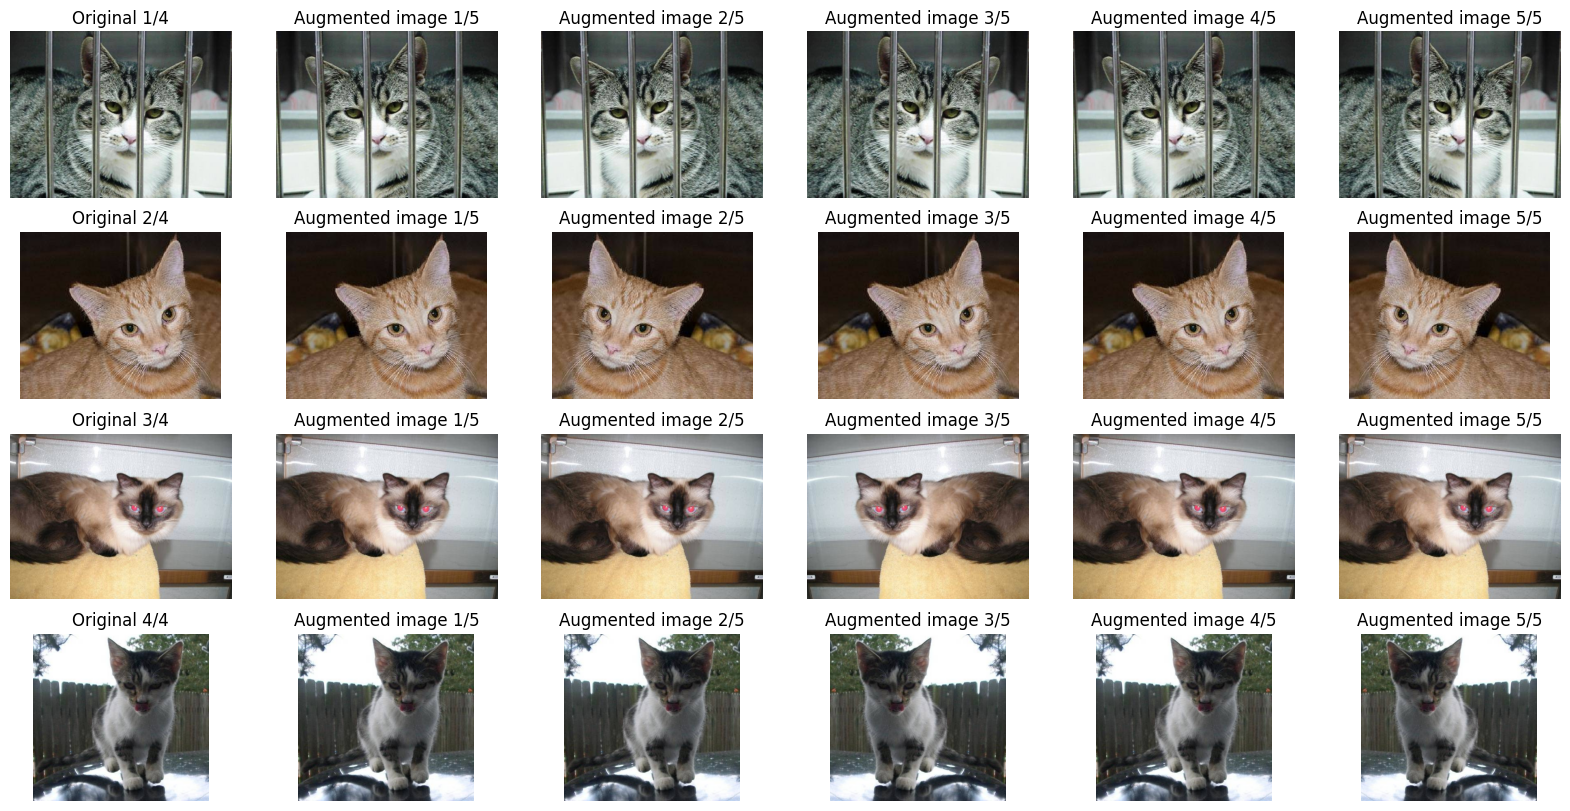

In [65]:
# Print at most 5 augmented images!
augmented_image_visualization_amount = min(
    AUGMENTATION_REPLICA_DISPLAY_AMOUNT, AUGMENTATION_REPLICA_AMOUNT
)
sample_image_visualization_amount = min(SAMPLE_IMAGE_DISPLAY_AMOUNT, len(sample_images))

fig, axarr = plt.subplots(
    AUGMENTATION_RANDOM_CHECK_AMOUNT, augmented_image_visualization_amount + 1
)
fig.set_figheight(10)
fig.set_figwidth(20)


if AUGMENTATION_RANDOM_CHECK_AMOUNT == 1:
    # For 1 sample image
    axarr[0].axis("off")
    axarr[0].set_title("Original")
    axarr[0].imshow(sample_images[0])
    print(
        f"NOTICE: Just print first {augmented_image_visualization_amount} augmented images!"
    )
    for i in range(1, augmented_image_visualization_amount + 1):
        axarr[i].axis("off")
        axarr[i].set_title(f"Augmented image {i}")
        axarr[i].imshow(transformed_image_matrix[0][i - 1])
else:
    # For multiple sample images
    print(
        f"NOTICE: Just print first {augmented_image_visualization_amount} augmented images!"
    )
    for i in range(sample_image_visualization_amount):
        axarr[i, 0].axis("off")
        axarr[i, 0].set_title(f"Original {i+1}/{sample_image_visualization_amount}")
        axarr[i, 0].imshow(sample_images[i])

        for j in range(1, augmented_image_visualization_amount + 1):
            axarr[i, j].axis("off")
            axarr[i, j].set_title(
                f"Augmented image {j}/{augmented_image_visualization_amount}"
            )
            axarr[i, j].imshow(transformed_image_matrix[i][j - 1])